In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import gaussian_kde
from scipy.special import erf
current_palette = sns.color_palette()
import collections


In [106]:
def CONTOURP(x, y, sig=[2.,1.],N=200):

    x1,x2=0,x.max()+1
    y1,y2=0,y.max()+1
    if y.min() <= 0:
        y1=y.min()-1
    if x.min() <= 0:
        x1=x.min()-1
    
    xx = np.linspace(x1, x2, N)
    yy = np.linspace(y1, y2, N)

    XX, YY = np.meshgrid(xx, yy)
    values = np.vstack([x, y])
    positions = np.vstack([XX.ravel(), YY.ravel()])
    kernel = gaussian_kde(values)
    f = np.reshape(kernel(positions).T, XX.shape)

    PCT = 1.0 - np.cumsum(np.sort(f.ravel()))/np.sum(f)
    NN = np.sort(f.ravel())
    SO = [ ]
    for s in sig:
        SO += [NN[(np.abs(PCT - erf(s/np.sqrt(2.0)))).argmin()]]

    return xx,yy,f,SO

def kdesigplot(dat,var1,var2,ax):
    plv=[var1,var2]
    X=dat[plv[0]]
    Y=dat[plv[1]]
    Xmesh,Ymesh,kern,lev=CONTOURP(X,Y)
    g=sns.kdeplot(X,Y,cmap='Blues',shade=True,ax=ax)
    ax.scatter(X,Y, c="k", s=30, alpha=0.2, linewidth=1, marker="+")
#    g.plot_joint(ax.scatter, c="k", s=30, alpha=0.2, linewidth=1, marker="+")
#    g.ax_joint.legend_.remove()
    ax.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[0]],linestyles=('dashed','solid'))

def kdesigplt(dat,var1,var2):
    plv=[var1,var2]
    X=dat[plv[0]]
    Y=dat[plv[1]]
    Xmesh,Ymesh,kern,lev=CONTOURP(X,Y)
    g=sns.jointplot(X,Y,kind='kde', n_levels=50)
    g.plot_joint(plt.scatter, c="k", s=30, alpha=0.2, linewidth=1, marker="+")
    g.ax_joint.legend_.remove()
    plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[0]],linestyles=('dashed','solid'))

def corrcont(ref,mylist,df,off=0.,sca=False):
    v=[ref,mylist]
    sns.lmplot(x=v[0],y=v[1],data=df,hue="gia", scatter=sca)
    Xmesh,Ymesh,kern,lev=CONTOURP(df[v[0]][~df.gia],df[v[1]][~df.gia],sig=[2,1])
    plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[0]],linestyles=('dashed','solid'))
    Xmesh,Ymesh,kern,lev=CONTOURP(df[v[0]][df.gia],df[v[1]][df.gia],sig=[2,1])
    plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[1]],linestyles=('dashed','solid'))
    plt.ylim(np.min(df[v[1]])-off,np.max(df[v[1]])+off)
    plt.xlim(np.min(df[v[0]]),np.max(df[v[0]]))
    plt.scatter(np.percentile(df[v[0]][~df.gia],50),np.percentile(df[v[1]][~df.gia],50),marker='*',s=100,c=current_palette[0])
    plt.scatter(np.percentile(df[v[0]][df.gia],50),np.percentile(df[v[1]][df.gia],50),marker='*',s=100,c=current_palette[1])
    plt.xlabel(v[0])
    plt.ylabel(v[1])

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
fold='../prep/'

In [4]:
dn=pd.read_csv(fold+'proc_no_pert.csv',index_col=None)
dn["gia"]=dn.ngi>0
dl=pd.read_csv(fold+'proc_lo_pert.csv',index_col=None)
dl["gia"]=dl.ngi>0
dh=pd.read_csv(fold+'proc_hi_pert.csv',index_col=None)
dh["gia"]=dh.ngi>0

In [161]:
dh.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,qest,ngi,mtr,apert,gia,logeff,logcom,avma
0,0,3.0,0.528895,12.0,5818.115137,0.311685,90.793337,0.056,29.539343,0.880114,0.328146,1.644711e+06,8.421395,3.0,9.132650,0.3,True,-0.506284,-0.276631,0.761054
1,1,5.0,2.406300,13.0,31.567339,0.000861,102.431593,0.110,38.977428,1.075269,-0.150160,1.014449e+06,5.464831,1.0,17.678581,0.3,True,-3.065033,0.381350,1.359891
2,2,6.0,1.082299,9.0,5886.747227,0.147169,75.740878,0.120,47.343380,0.861595,0.021273,1.790533e+06,4.412694,1.0,8.262408,0.3,True,-0.832185,0.034347,0.918045
3,3,8.0,7.503351,9.0,7.884462,0.000158,62.737337,0.150,58.158928,1.076658,-0.282408,6.017040e+06,4.704798,0.0,7.884462,0.3,False,-3.802198,0.875255,0.876051
4,4,13.0,5.247285,12.0,33.730980,0.000595,178.830700,0.170,36.672222,1.206445,-0.174039,3.956708e+06,3.998513,1.0,8.003117,0.3,True,-3.225299,0.719935,0.666926


In [154]:
dnt=dn[~dn["gia"]]
dlt=dl[~dl["gia"]]
dht=dh[~dh["gia"]]
dng=dn[dn["gia"]]
dlg=dl[dl["gia"]]
dhg=dh[dh["gia"]]

dn['logeff']=np.log10(dn.massefficiency)
dl['logeff']=np.log10(dl.massefficiency)
dh['logeff']=np.log10(dh.massefficiency)
dng['logeff']=np.log10(dng.massefficiency)
dlg['logeff']=np.log10(dlg.massefficiency)
dhg['logeff']=np.log10(dhg.massefficiency)
dnt['logeff']=np.log10(dnt.massefficiency)
dlt['logeff']=np.log10(dlt.massefficiency)
dht['logeff']=np.log10(dht.massefficiency)

dn['logcom']=np.log10(dn.com)
dl['logcom']=np.log10(dl.com)
dh['logcom']=np.log10(dh.com)
dng['logcom']=np.log10(dng.com)
dlg['logcom']=np.log10(dlg.com)
dhg['logcom']=np.log10(dhg.com)
dnt['logcom']=np.log10(dnt.com)
dlt['logcom']=np.log10(dlt.com)
dht['logcom']=np.log10(dht.com)



dn['avma']=(dn.mtr/dn.nplanets)
dl['avma']=(dl.mtr/dl.nplanets)
dh['avma']=(dh.mtr/dh.nplanets)
dng['avma']=(dng.mtr/dng.nplanets)
dlg['avma']=(dlg.mtr/dlg.nplanets)
dhg['avma']=(dhg.mtr/dhg.nplanets)
dnt['avma']=(dnt.mtr/dnt.nplanets)
dlt['avma']=(dlt.mtr/dlt.nplanets)
dht['avma']=(dht.mtr/dht.nplanets)



In [168]:
dng['mgi']=(dng.massbudget-dng.mtr)
dlg['mgi']=(dlg.massbudget-dlg.mtr)
dhg['mgi']=(dhg.massbudget-dhg.mtr)

dng['avmag']=(dng.massbudget-dng.mtr)/dng.ngi
dlg['avmag']=(dlg.massbudget-dlg.mtr)/dlg.ngi
dhg['avmag']=(dhg.massbudget-dhg.mtr)/dhg.ngi

In [176]:
((dn.nplanets-dn.ngi)==0).sum()

2

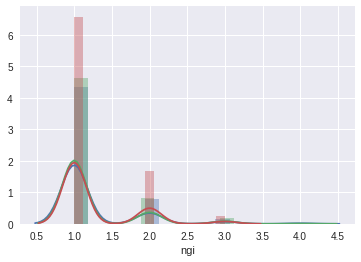

In [6]:
# more giant planets if there are perturbations
sns.distplot(dng.ngi)
sns.distplot(dlg.ngi)
sns.distplot(dhg.ngi)

(array([ 0.77346278,  0.197411  ,  0.02912621,  0.        ]),
 array([1, 2, 3, 4, 5]),
 <a list of 4 Patch objects>)

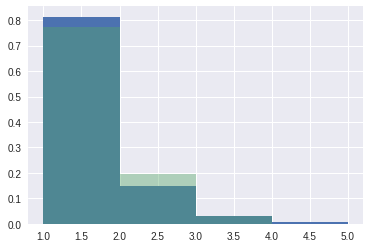

In [7]:
# 5% more chance to have 2 instead of 1 giant planet in the perturbed case
plt.hist(dng.ngi,normed=True,bins=[1,2,3,4,5])
#plt.hist(dlg.ngi,normed=True,bins=[1,2,3,4,5],alpha=0.2)
plt.hist(dhg.ngi,normed=True,bins=[1,2,3,4,5],alpha=0.4)

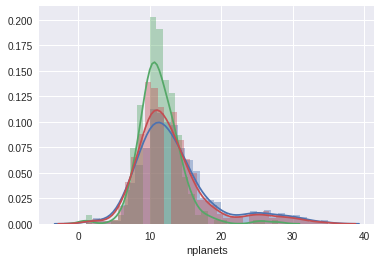

In [8]:
var='nplanets'
#fig=plt.figure(figsize=(15,4))
sns.distplot(dnt[var])
sns.distplot(dng[var])
sns.distplot(dn[var])

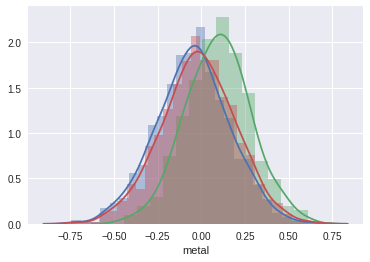

In [10]:
#fig=plt.figure(figsize=(20,4))
sns.distplot(dnt.metal)
sns.distplot(dng.metal)
sns.distplot(dn.metal)

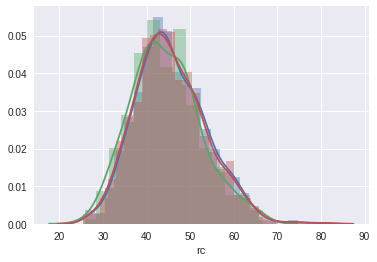

In [11]:
#fig=plt.figure(figsize=(20,4))
sns.distplot(dnt.rc)
sns.distplot(dng.rc)
sns.distplot(dn.rc)

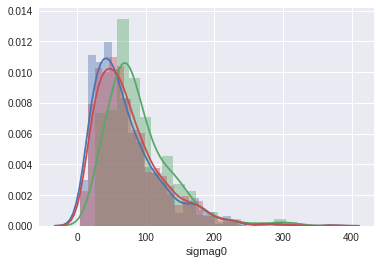

In [12]:
var='sigmag0'
#fig=plt.figure(figsize=(20,4))
sns.distplot(dnt[var])
sns.distplot(dng[var])
sns.distplot(dn[var])

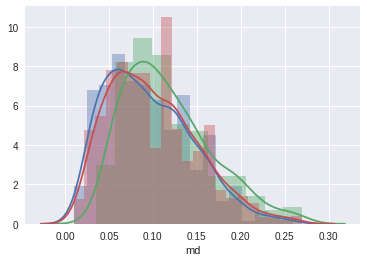

In [13]:
var='md'
#fig=plt.figure(figsize=(20,4))
sns.distplot(dnt[var])
sns.distplot(dng[var])
sns.distplot(dn[var])

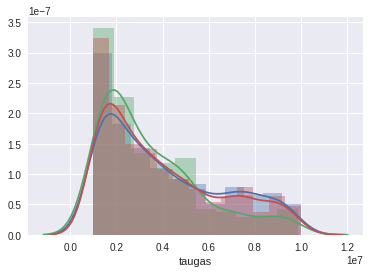

In [14]:
var='taugas'
#fig=plt.figure(figsize=(20,4))
sns.distplot(dnt[var])
sns.distplot(dng[var])
sns.distplot(dn[var])

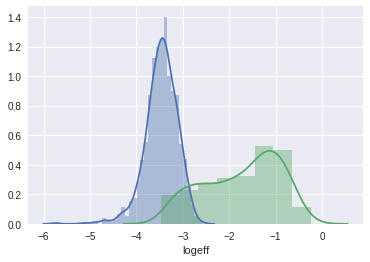

In [16]:
var='logeff'
#fig=plt.figure(figsize=(20,4))
sns.distplot(dnt[var])
sns.distplot(dng[var])

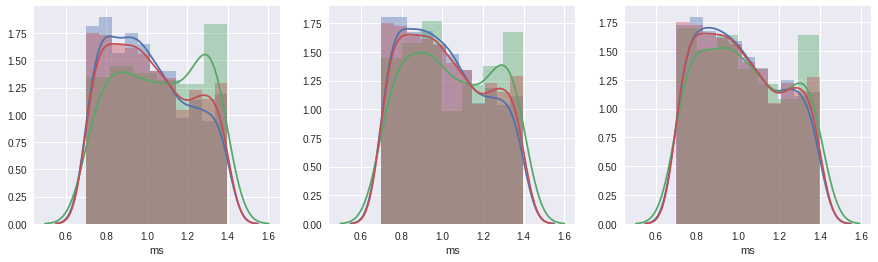

In [9]:
var='ms'
fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)

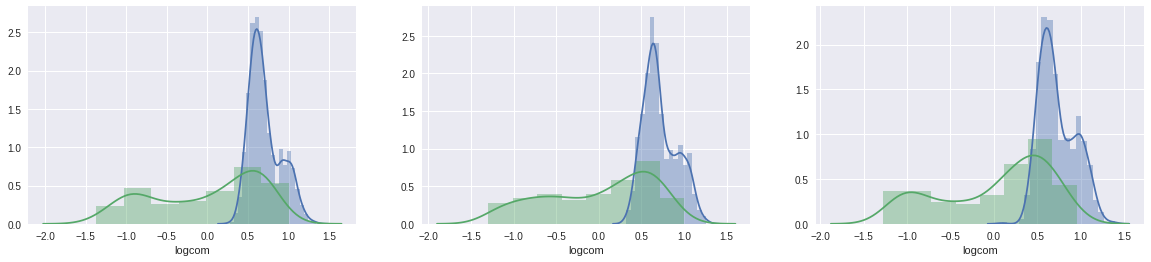

In [69]:
var='logcom'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)

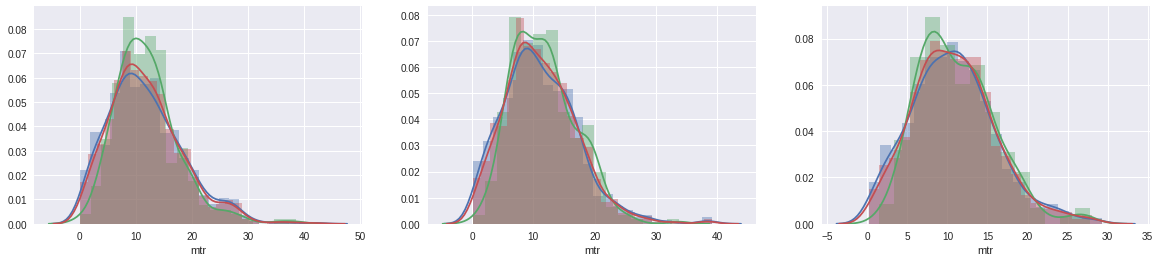

In [70]:
var='mtr'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)

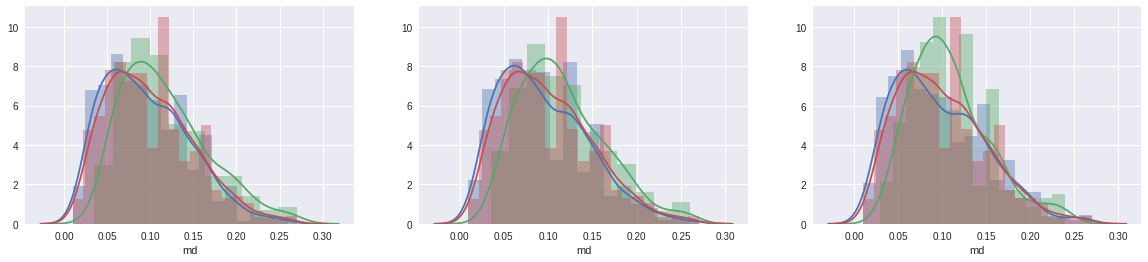

In [71]:
var='md'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)

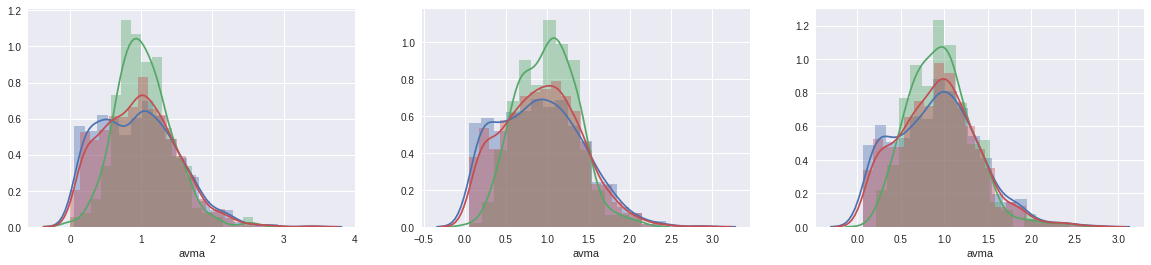

In [155]:
var='avma'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)

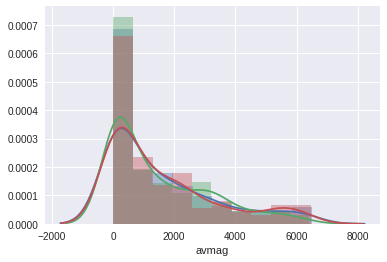

In [166]:
var='avmag'
sns.distplot(dng[var])
sns.distplot(dlg[var])
sns.distplot(dhg[var])

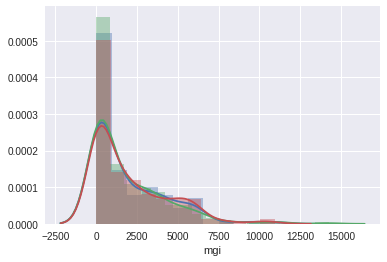

In [169]:
var='mgi'
sns.distplot(dng[var])
sns.distplot(dlg[var])
sns.distplot(dhg[var])

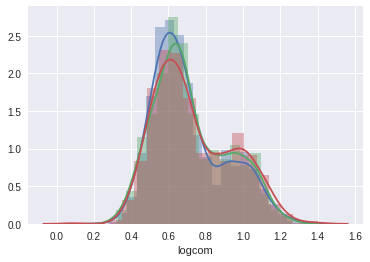

In [152]:
var='logcom'
sns.distplot(dnt[var])
sns.distplot(dlt[var])
sns.distplot(dht[var])

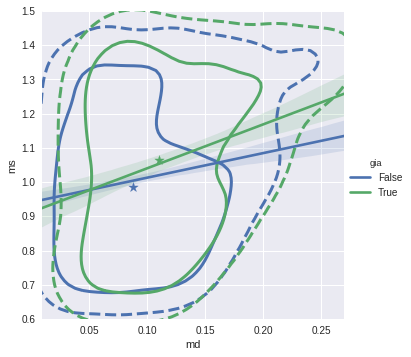

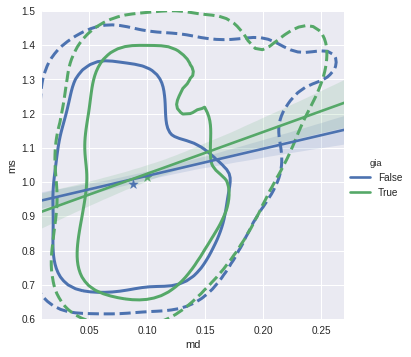

In [79]:
var1="md"
var2='ms'
off=0.1
corrcont(var1,var2,dn,off)
plt.show()
corrcont(var1,var2,dh,off)

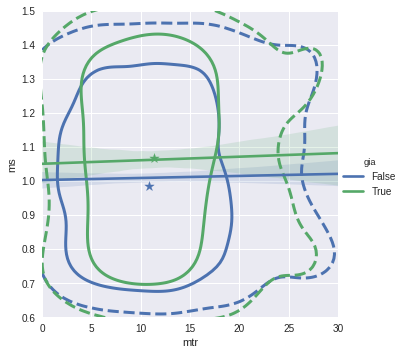

(0, 30)

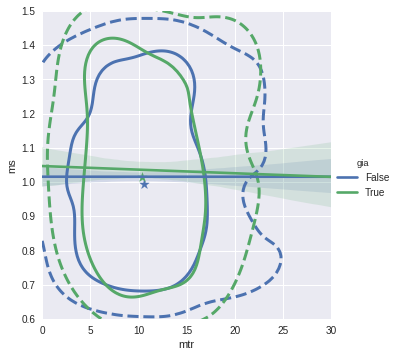

In [101]:
var1="mtr"
var2='ms'
corrcont(var1,var2,dn,0.1)
plt.xlim(0,30)
plt.show()
corrcont(var1,var2,dh,0.1)
plt.xlim(0,30)

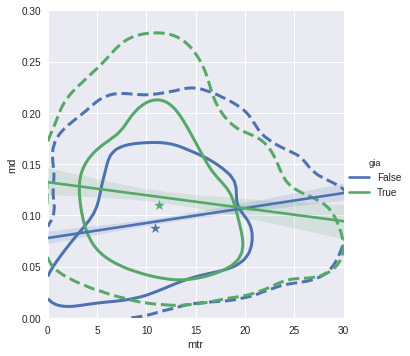

(0, 0.3)

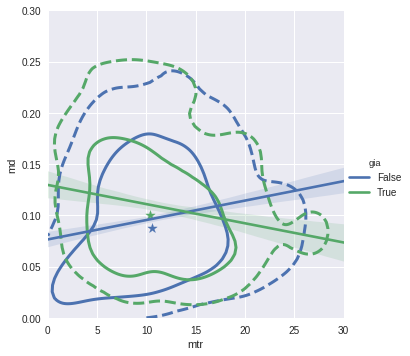

In [103]:
var1="mtr"
var2='md'
corrcont(var1,var2,dn,0.1)
plt.xlim(0,30)
plt.ylim(0,0.3)
plt.show()
corrcont(var1,var2,dh,0.1)
plt.xlim(0,30)
plt.ylim(0,0.3)


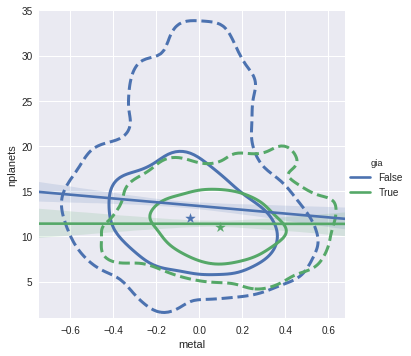

In [68]:
var1="metal"
var2='nplanets'
corrcont(var1,var2,dn)

(-4.5, -0.5)

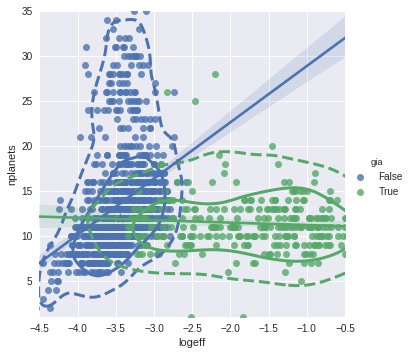

In [110]:
var2="nplanets"
var1='logeff'
corrcont(var1,var2,dn,0,True)
plt.xlim(-4.5,-0.5)

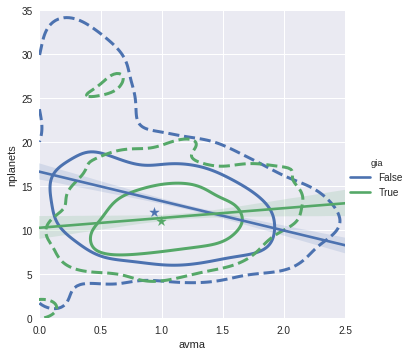

(0, 35)

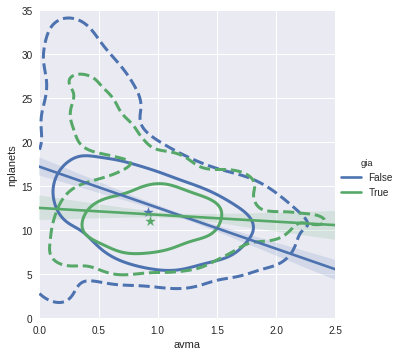

In [160]:
var2="nplanets"
var1='avma'
corrcont(var1,var2,dn)
plt.xlim(0,2.5)
plt.ylim(0,35)
plt.show()
corrcont(var1,var2,dh)
plt.xlim(0,2.5)
plt.ylim(0,35)

(-4.5, -0.5)

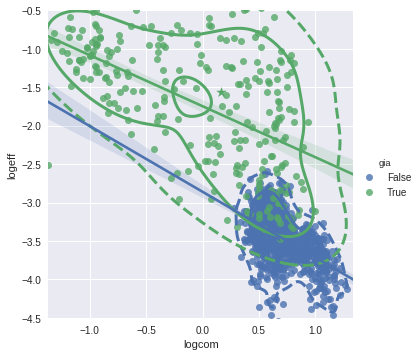

In [107]:
var1="logcom"
var2='logeff'
corrcont(var1,var2,dn,0,True)
plt.ylim(-4.5,-0.5)

(0, 250)

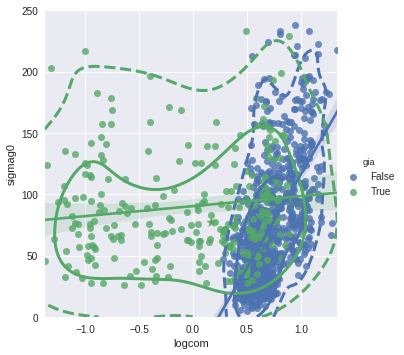

In [108]:
var1="logcom"
var2='sigmag0'
corrcont(var1,var2,dn,0,True)
plt.ylim(0,250)

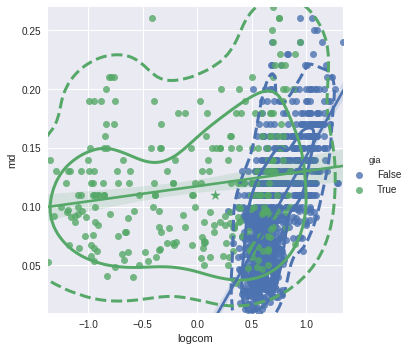

In [111]:
var1="logcom"
var2='md'
corrcont(var1,var2,dn,0,True)
#plt.ylim(0,250)

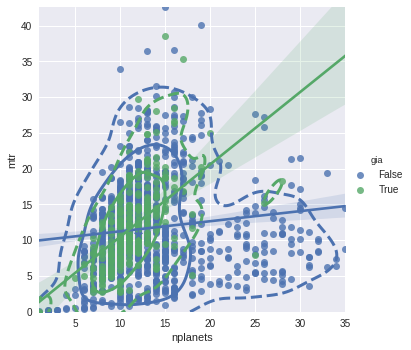

In [109]:
var1="nplanets"
var2='mtr'
corrcont(var1,var2,dn,0,True)

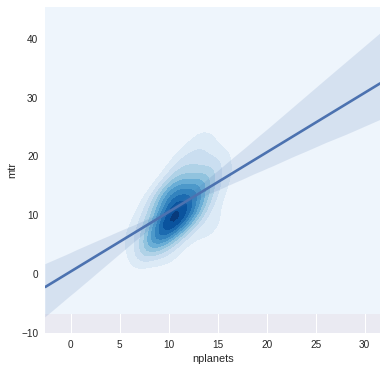

In [133]:
df=dn
var1="nplanets"
var2='mtr'
filter=df.gia
plt.figure(figsize=(6,6))
sns.kdeplot(df[var1][filter], df[var2][filter],shade=True,cmap='Blues')
sns.regplot(df[var1][filter],df[var2][filter], scatter=False)
plt.show()

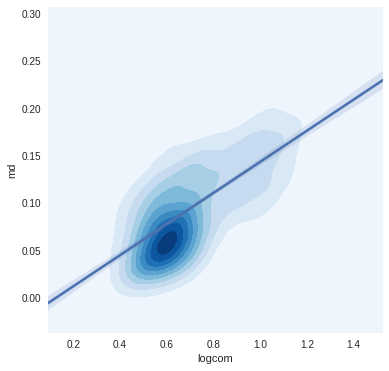

In [135]:
df=dn
var1="logcom"
var2='md'
filter=~df.gia
plt.figure(figsize=(6,6))
sns.kdeplot(df[var1][filter], df[var2][filter],shade=True,cmap='Blues')
sns.regplot(df[var1][filter],df[var2][filter], scatter=False)
plt.show()

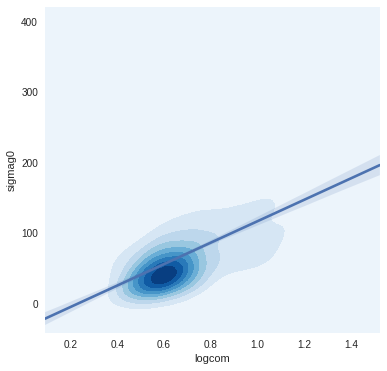

In [153]:
var1="logcom"
var2='sigmag0'
df=dn
filter=~df.gia
plt.figure(figsize=(6,6))
sns.kdeplot(df[var1][filter], df[var2][filter],shade=True,cmap='Blues')
sns.regplot(df[var1][filter],df[var2][filter], scatter=False)
plt.show()

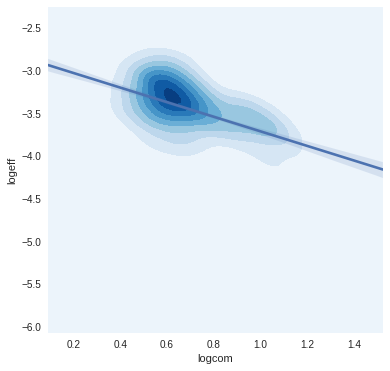

In [137]:
var1="logcom"
var2='logeff'
df=dn
filter=~df.gia
plt.figure(figsize=(6,6))
sns.kdeplot(df[var1][filter], df[var2][filter],shade=True,cmap='Blues')
sns.regplot(df[var1][filter],df[var2][filter], scatter=False)
plt.show()

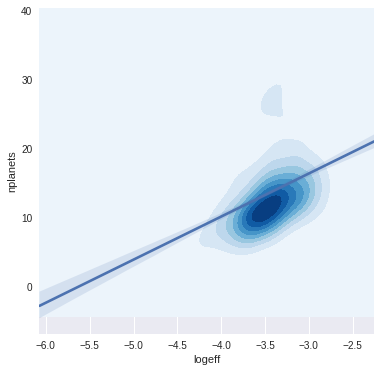

In [139]:
var2="nplanets"
var1='logeff'
df=dn
filter=~df.gia
plt.figure(figsize=(6,6))
sns.kdeplot(df[var1][filter], df[var2][filter],shade=True,cmap='Blues')
sns.regplot(df[var1][filter],df[var2][filter], scatter=False)
plt.show()

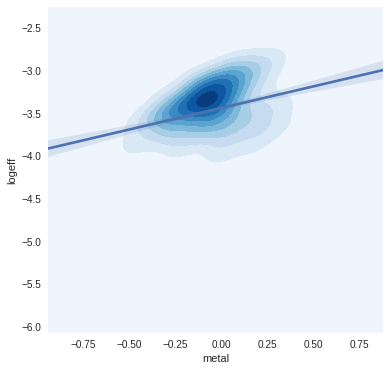

In [143]:
var1="metal"
var2='logeff'
df=dn
filter=~df.gia
plt.figure(figsize=(6,6))
sns.kdeplot(df[var1][filter], df[var2][filter],shade=True,cmap='Blues')
sns.regplot(df[var1][filter],df[var2][filter], scatter=False)
plt.show()

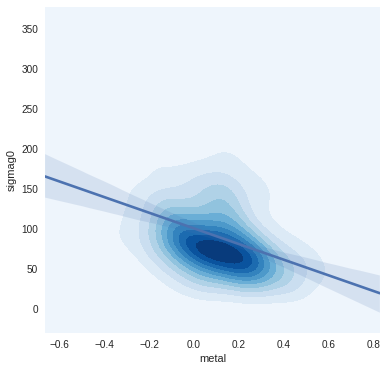

In [148]:
var1="metal"
var2='sigmag0'
df=dn
filter=df.gia
plt.figure(figsize=(6,6))
sns.kdeplot(df[var1][filter], df[var2][filter],shade=True,cmap='Blues')
sns.regplot(df[var1][filter],df[var2][filter], scatter=False)
plt.show()

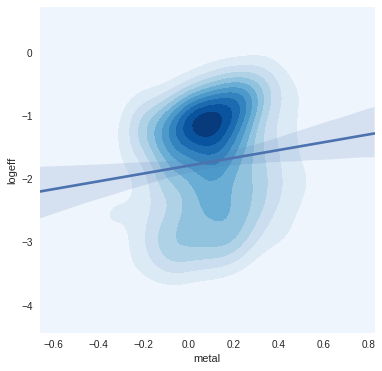

In [149]:
var1="metal" # no correlation
var2='logeff'
df=dn
filter=df.gia
plt.figure(figsize=(6,6))
sns.kdeplot(df[var1][filter], df[var2][filter],shade=True,cmap='Blues')
sns.regplot(df[var1][filter],df[var2][filter], scatter=False)
plt.show()

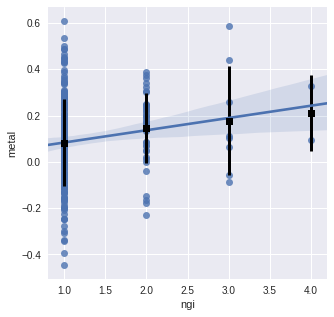

In [150]:
# number of giant planets per system correlates with metallicity
plt.figure(figsize=(5,5))
linp=np.unique(dng.ngi)
eff=np.array([dng.metal[dng.ngi==i].mean() for i in linp])
seff=np.array([dng.metal[dng.ngi==i].std() for i in linp])
plt.errorbar(linp,eff,seff,fmt='sk',elinewidth=3)
sns.regplot(dng.ngi,dng.metal)

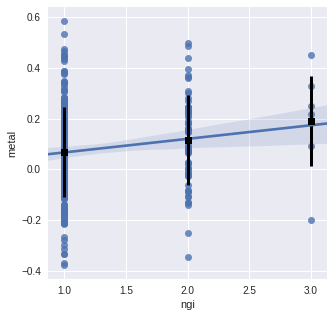

In [151]:
# number of giant planets per system correlates with metallicity
plt.figure(figsize=(5,5))
linp=np.unique(dhg.ngi)
eff=np.array([dhg.metal[dhg.ngi==i].mean() for i in linp])
seff=np.array([dhg.metal[dhg.ngi==i].std() for i in linp])
plt.errorbar(linp,eff,seff,fmt='sk',elinewidth=3)
sns.regplot(dhg.ngi,dhg.metal)

In [187]:
de=pd.read_csv("../prep/exoplanet.eu_catalog.csv")
mjup=317.83 # in earth masses, as you do

In [228]:
# COM - solar system -> has giants
(0.387*.055+0.723*0.815+1*1+1.524*0.107+5.201*317.8+9.529*95.3+19.19*14.6+30.06*17.23)/(0.055+0.815+1+.107+317.8+95.3+146+17.23)

5.8115722237496685

In [232]:
sol={'ms':1,'com':5.81,'ngi':4,'metal':0}

In [329]:
dnpco=de[np.isfinite(de['mass'])] #only valid masses -> needed for com, mtr
print("planets:"+str(len(dnpco)))
df=dnpco
lip=collections.Counter(df.star_name)
snames=np.array(list(lip.keys()))
npl=np.array(list(lip.values()))
print("systems:"+str(len(npl)))
com,gia,metal,mtr,ngi=[],[],[],[],[] #here
mycols=['mass','semi_major_axis','star_metallicity']
dd=df[mycols]
for i in snames:
    filter=df.star_name==i
    dummy=dd[filter]
    giafil=dummy.mass*mjup>10
    gia+=[np.any(giafil)]
    com+=[(dummy.mass*dummy.semi_major_axis).sum()/dummy.mass.sum()] #nan semi major axis screws this up
    metal+=[(dummy.star_metallicity.iloc[0])]
    if (~giafil).sum()>0:
        mtr+=[dummy.mass[~giafil].sum()*mjup]
    else:
        mtr+=[0]
    if giafil.sum()>0:
        ngi+=[giafil.sum()]
    else:
        ngi+=[0]
aaa=[]
for i in [com,gia,metal,mtr,ngi]: #here
    aaa+=[np.array(i)]
com,gia,metal,mtr,ngi=aaa #here

planets:1653
systems:1284


70


(0, 16)

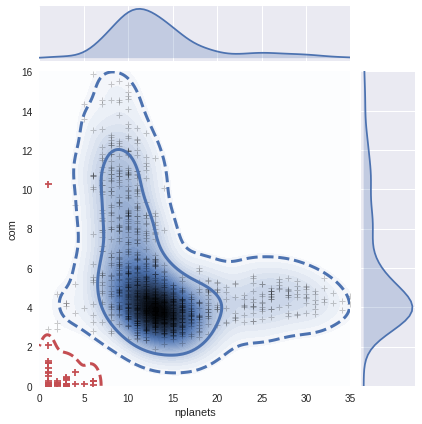

In [330]:
kdesigplt(dnt,'nplanets','com')
filt=~np.array(gia)&np.isfinite(com)
X,Y=npl[filt],com[filt]
print(filt.sum())
plt.scatter(X,Y,marker='+',c=current_palette[2])
Xmesh,Ymesh,kern,lev=CONTOURP(X,Y,sig=[2.])
plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('dashed','solid'))

plt.xlim(0,35)
plt.ylim(0,16)

47


(0, 15)

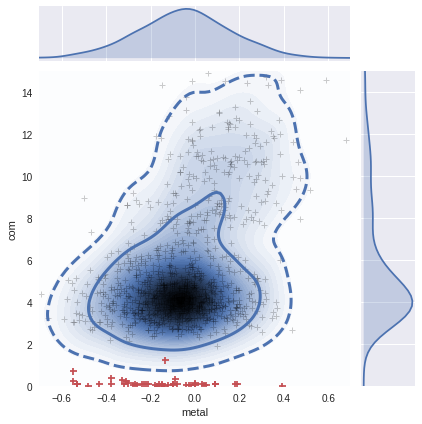

In [331]:
kdesigplt(dnt,'metal','com')
filt=(~np.array(gia))&np.isfinite(com)&np.isfinite(metal)
X,Y=metal[filt],com[filt]
print(filt.sum())
plt.scatter(X,Y,marker='+',c=current_palette[2])
#Xmesh,Ymesh,kern,lev=CONTOURP(X,Y,sig=[2.])
#plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('dashed','solid'))
xli=(-0.7,0.7)
yli=(0,15)
plt.xlim(xli)
plt.ylim(yli)
# get kde predictor and predict?

70


(0, 0.3)

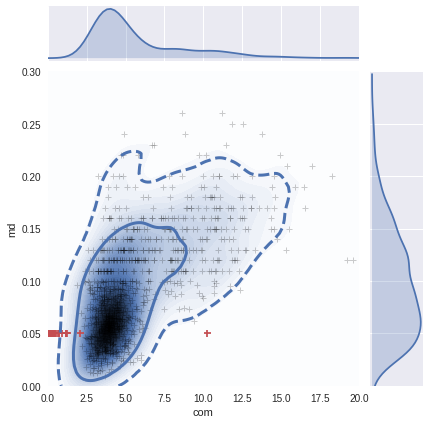

In [332]:
var1='com'
var2='md'
xli=(0,20)
yli=(0,0.3)
kdesigplt(dnt,var1,var2)
filt=(~np.array(gia))&np.isfinite(com)
X=com[filt]
print(filt.sum())
plt.scatter(X,0.05*np.ones(len(X)),marker='+',c=current_palette[2])
plt.xlim(xli)
plt.ylim(yli)
# with previous prediction re-predict?
# better to plot com histogram and show arrow
# otherwise, not too interesting

52


(0, 34)

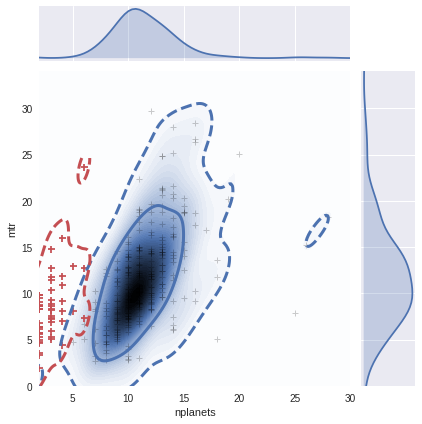

In [333]:
var1='nplanets'
var2='mtr'
kdesigplt(dng,var1,var2)
xli=(2,30)
yli=(0,34)
filt=(np.array(gia))&(mtr>0)
X,Y=npl[filt],mtr[filt]
print(filt.sum())
plt.scatter(X,Y,marker='+',c=current_palette[2])
Xmesh,Ymesh,kern,lev=CONTOURP(X,Y,sig=[2.])
plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('dashed','solid'))
plt.xlim(xli)
plt.ylim(yli)

86


(0, 34)

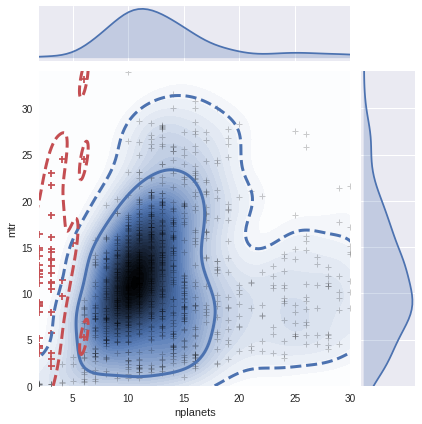

In [334]:
var1='nplanets'
var2='mtr'
xli=(2,30)
yli=(0,34)
kdesigplt(dnt,var1,var2)
filt=(~np.array(gia))
X,Y=npl[filt],mtr[filt]
print(filt.sum())
plt.scatter(X,Y,marker='+',c=current_palette[2])
Xmesh,Ymesh,kern,lev=CONTOURP(X,Y,sig=[2.])
plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('dashed','solid'))
plt.xlim(xli)
plt.ylim(yli)

86


(0, 0.3)

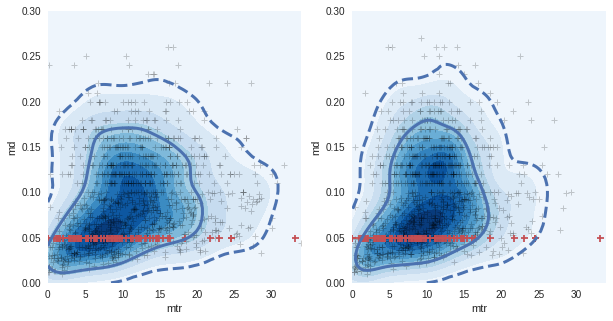

In [336]:
var2='md' # do predictions with this one
var1='mtr'
yli=(0,0.3)
xli=(0,34)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax3=fig.add_subplot(122)
kdesigplot(dnt,var1,var2,ax1)
filt=(~np.array(gia))
print(filt.sum())
X=mtr[filt]
ax1.scatter(X,0.05*np.ones(len(X)),marker='+',c=current_palette[2])
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.scatter(X,0.05*np.ones(len(X)),marker='+',c=current_palette[2])

ax3.set_xlim(xli)
ax3.set_ylim(yli)

70


(-5, -2.5)

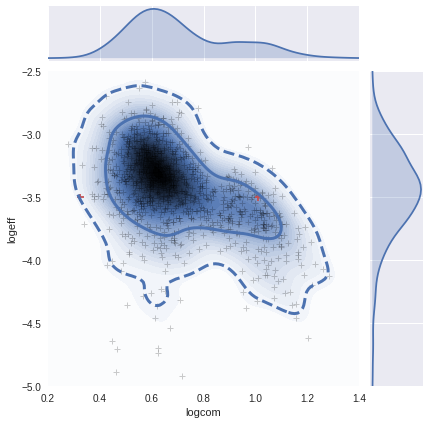

In [270]:
var1='logcom'
var2='logeff'
xli=(0.2,1.4)
yli=(-5,-2.5)
kdesigplt(dnt,var1,var2)
filt=(~np.array(gia))&np.isfinite(com)
X=np.log10(com[filt]) # better to use predictions here instead of measured com
print(filt.sum())
plt.scatter(X,-3.5*np.ones(len(X)),marker='+',c=current_palette[2])

plt.xlim(xli)
plt.ylim(yli)

(0, 0.3)

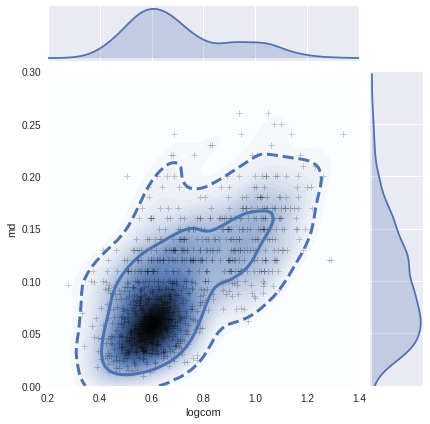

In [285]:
var1='logcom' # only worth it with predictions
var2='md'
xli=(0.2,1.4)
yli=(0,0.3)
kdesigplt(dnt,var1,var2)
plt.xlim(xli)
plt.ylim(yli)

(0, 250)

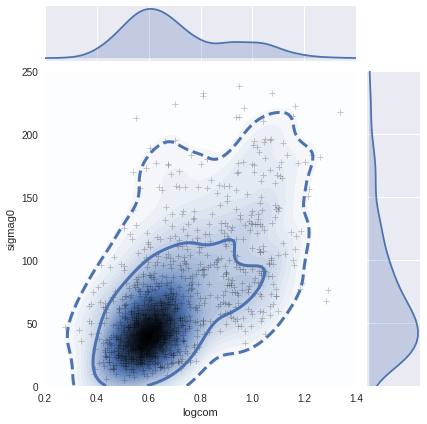

In [286]:
var1='logcom'
var2='sigmag0' #only worth it with predictions
xli=(0.2,1.4)
yli=(0,250)
kdesigplt(dnt,var1,var2)
plt.xlim(xli)
plt.ylim(yli)

1126


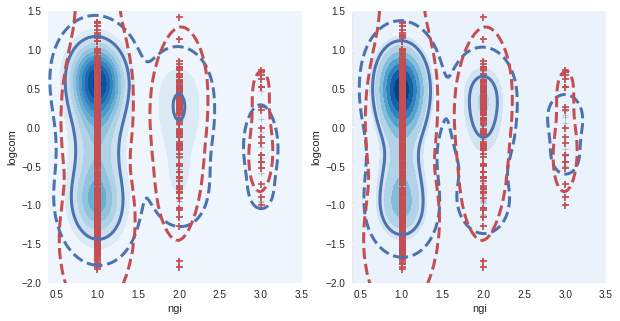

In [298]:
var1='ngi'
var2='logcom'
xli=(0.4,3.5)
yli=(-2,1.5)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax3=fig.add_subplot(122)
kdesigplot(dng,var1,var2,ax1)
filt=(np.array(gia))&np.isfinite(com)
X,Y=ngi[filt],np.log10(com[filt])
print(filt.sum())
Xmesh,Ymesh,kern,lev=CONTOURP(X,Y,sig=[2.])
ax1.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('dashed','solid'))
ax1.scatter(X,Y,marker='+',c=current_palette[2])
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dhg,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)
ax3.scatter(X,Y,marker='+',c=current_palette[2])
ax3.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('dashed','solid'))


In [301]:
dmsnp=de[np.isfinite(de['star_mass'])]
df=dmsnp
print("planets:"+str(len(df)))
lip=collections.Counter(df.star_name)
snames=np.array(list(lip.keys()))
npl=np.array(list(lip.values()))
print("systems:"+str(len(npl)))
ms,gia,com=[],[],[] #here
mycols=['star_mass','mass','semi_major_axis']
dd=df[mycols]
for i in snames:
    filter=df.star_name==i
    dummy=dd[filter]
    giafil=dummy.mass*mjup>10
    gia+=[np.any(giafil)]
    ms+=[dummy.star_mass.iloc[0]]
    com+=[(dummy.mass*dummy.semi_major_axis).sum()/dummy.mass.sum()] #nan semi major axis screws this up
aaa=[]
for i in [ms,gia,com]: #here
    aaa+=[np.array(i)]
ms,gia,com=aaa #here

planets:3432
systems:2666


1535


(0, 40)

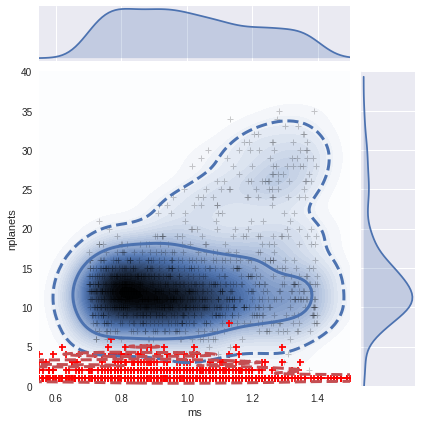

In [325]:
var1='ms'
var2='nplanets'
filt=~np.array(gia)
X,Y=ms[filt],npl[filt]
print(filt.sum())
kdesigplt(dnt,var1,var2)
plt.scatter(X,Y,marker='+',c='r')
Xmesh,Ymesh,kern,lev=CONTOURP(X,Y,sig=[2.])
plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('dashed','solid'))
xli=(0.55,1.5)
yli=(0,40)
plt.xlim(xli)
plt.ylim(yli)

64


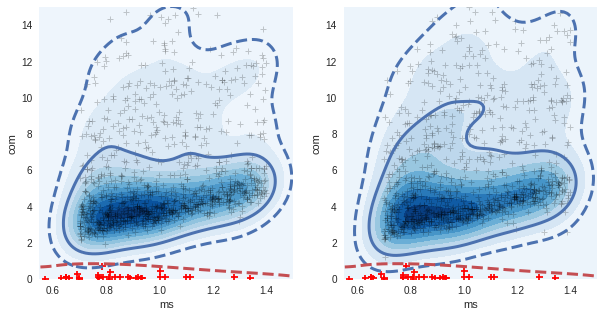

In [321]:
var1='ms'
var2='com'
xli=(0.55,1.5)
yli=(0,15)
fig=plt.figure(figsize=(10,5))
filt=~np.array(gia)&np.isfinite(com)
X,Y=ms[filt],com[filt]
print(filt.sum())
ax1=fig.add_subplot(121)
ax3=fig.add_subplot(122)
kdesigplot(dnt,var1,var2,ax1)
ax1.scatter(X,Y,marker='+',c='r')
Xmesh,Ymesh,kern,lev=CONTOURP(X,Y,sig=[2.])
ax1.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('dashed','solid'))
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.scatter(X,Y,marker='+',c='r')
ax3.set_xlim(xli)
ax3.set_ylim(yli)
ax3.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('dashed','solid'))

1075


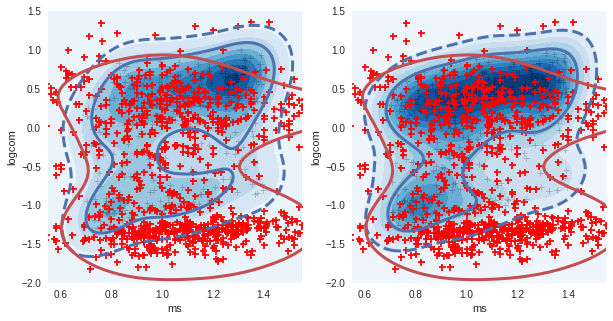

In [320]:
var1='ms'
var2='logcom'
xli=(0.55,1.55)
yli=(-2,1.5)
filt=np.array(gia)&np.isfinite(com)
X,Y=ms[filt],np.log10(com[filt])
print(filt.sum())
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax3=fig.add_subplot(122)
kdesigplot(dng,var1,var2,ax1)
Xmesh,Ymesh,kern,lev=CONTOURP(X,Y,sig=[1.])

ax1.scatter(X,Y,marker='+',c='r')
ax1.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('solid'))
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dhg,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

ax3.scatter(X,Y,marker='+',c='r')
ax3.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[2]],linestyles=('solid'))
